In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import ast

# Recipe Reccomendation System with sklearn
## part 2: EDA of RecipeNLG dataset

In [3]:
# Prints first n values from specified column in a pd.DataFrame   
def print_values_in_first_n_rows(dataset, column_name, n = 5, is_list = False):
    for row, column_value in enumerate(dataset[column_name]):
        if is_list:
            print(*column_value, sep=", ")
        else:
            print(column_value)
        print()
        if row >= n - 1:
            break

# Returns flattened list of all item occurrences (lowercase) from specified column in a pd.DataFrame 
# Assumes initial values in the column are of type list
def item_occurences_lst(dataset, column_name):
    result = dataset[column_name][dataset[column_name].notna()] # Series of valid list values
    result = [item.lower() for item_list in result for item in item_list]
    return result

In [4]:
recipes_nlg = pd.read_csv(
    "data/RecipeNGL/full_dataset.csv", 
    # nrows=10, 
    index_col=0)

In [5]:
recipes_nlg["site"] = recipes_nlg.link.str.split("/").apply(lambda x: x[0])

In [6]:
recipes_nlg.site.value_counts()

site
www.cookbooks.com          896341
www.food.com               499616
www.epicurious.com         129444
tastykitchen.com            78768
www.myrecipes.com           64895
www.allrecipes.com          61398
cookpad.com                 61020
cookeatshare.com            59307
www.yummly.com              51963
www.tasteofhome.com         51594
www.foodnetwork.com         49443
food52.com                  48501
www.kraftrecipes.com        42010
recipeland.com              24418
recipes-plus.com            20524
cooking.nytimes.com         16367
www.foodandwine.com         15436
www.seriouseats.com         12632
www.foodgeeks.com            8963
www.cookstr.com              8797
online-cookbook.com          5691
www.chowhound.com            5671
www.vegetariantimes.com      4578
www.delish.com               3880
allrecipes.com               3204
www.landolakes.com           2492
www.foodrepublic.com         2259
www.lovefood.com             1930
Name: count, dtype: int64

In [7]:
recipes_nlg.NER = recipes_nlg.NER.apply(ast.literal_eval)

In [8]:
ingredients_list = item_occurences_lst(recipes_nlg, "NER")
ingredients_counter = Counter(ingredients_list)

In [9]:
len(ingredients_counter)

199060

In [10]:
ingredients_counter.most_common(10)

[('salt', 1013708),
 ('sugar', 662832),
 ('butter', 539978),
 ('flour', 488086),
 ('eggs', 422212),
 ('onion', 391268),
 ('garlic', 388187),
 ('milk', 370285),
 ('water', 351248),
 ('vanilla', 293879)]

Make a dataframe from most common

In [11]:
ingredients = pd.DataFrame(ingredients_counter.most_common(), columns = ["ingredient", "occurences"])

In [12]:
ingredients.head(20)

,ingredient,occurences
0,salt,1013708
1,sugar,662832
2,butter,539978
3,flour,488086
4,eggs,422212
5,onion,391268
6,garlic,388187
7,milk,370285
8,water,351248
9,vanilla,293879


In [13]:
n_rows = ingredients.shape[0]
n_rows

199060

Save that before we mess up something:

In [14]:
ingredients.to_csv("most_common_ingredients.csv")

In [15]:
top_20 = ingredients_counter.most_common(20)

In [16]:
most_common_keys = list(reversed([x[0] for x in top_20]))

In [17]:
most_common_counts = list(reversed([x[1] for x in top_20]))

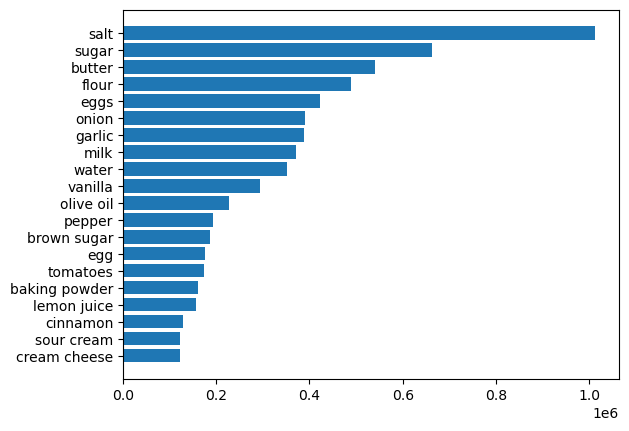

In [18]:
plt.barh(most_common_keys, most_common_counts)
plt.show()

In [19]:
#ingredients = pd.DataFrame.from_dict(ingredients_counter, orient='index').reset_index()

In [20]:
ingredients["frequency"] = ingredients.occurences / n_rows

In [21]:
ingredients

,ingredient,occurences,frequency
0,salt,1013708,5.092475
1,sugar,662832,3.329810
2,butter,539978,2.712639
3,flour,488086,2.451954
4,eggs,422212,2.121029
...,...,...,...
199055,fluid orville redenbachers,1,0.000005
199056,'s ricotta cheese,1,0.000005
199057,white string cheese,1,0.000005
199058,stone-grnd,1,0.000005


In [23]:
ingredients["name_word_list"] = ingredients.ingredient.str.split(" ")

In [24]:
ingredients

,ingredient,occurences,frequency,name_word_list
0,salt,1013708,5.092475,[salt]
1,sugar,662832,3.329810,[sugar]
2,butter,539978,2.712639,[butter]
3,flour,488086,2.451954,[flour]
4,eggs,422212,2.121029,[eggs]
...,...,...,...,...
199055,fluid orville redenbachers,1,0.000005,"[fluid, orville, redenbachers]"
199056,'s ricotta cheese,1,0.000005,"['s, ricotta, cheese]"
199057,white string cheese,1,0.000005,"[white, string, cheese]"
199058,stone-grnd,1,0.000005,[stone-grnd]


In [29]:
test_ingredients = ingredients[:5]

In [30]:
test_ingredients.name_word_list.str.join('|').str.get_dummies()

,butter,eggs,flour,salt,sugar
0,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
